In [1]:
from IPython.core.display import HTML
HTML("""
<style>
@import url("https://fonts.googleapis.com/css2?family=Raleway&family=Roboto:ital,wght@0,500;0,900;1,500&display=swap");
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    display: inline-block;
    text-align: center;
    border: 1px solid;
    padding: 30px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h2 {
    display: inline-block;
    text-align: center;
    border: 1px solid;
    padding: 25px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h3 {
    display: inline-block;
    text-align: center;
    border: 1px solid;
    padding: 20px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}


body, p, ul, li {
    font-family: Raleway;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: Raleway;
    font-size: 20px;
    background: linear-gradient(to right, #30CFD0 0%, #121FCF 100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}
</style>
""")

# Heart Disease EDA + AutoGluon Prediction

**About Dataset**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Attribute Information:**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# What is heart disease?
The term “heart disease” refers to several types of heart conditions. The most common type of heart disease in the United States is coronary artery disease (CAD), which affects the blood flow to the heart. Decreased blood flow can cause a heart attack.

## What are the symptoms of heart disease?
Sometimes heart disease may be “silent” and not diagnosed until a person experiences signs or symptoms of a heart attack, heart failure, or an arrhythmia. When these events happen, symptoms may include1

* Heart attack: Chest pain or discomfort, upper back or neck pain, indigestion, heartburn, nausea or vomiting, extreme fatigue, upper body discomfort, dizziness, and shortness of breath.
* Arrhythmia: Fluttering feelings in the chest (palpitations).
* Heart failure: Shortness of breath, fatigue, or swelling of the feet, ankles, legs, abdomen, or neck veins.

## What are the risk factors for heart disease?
Thease are key risk factors for heart disease.
* High blood pressure
* High blood cholesterol
* Smoking 


Credit: https://www.cdc.gov/

# Task
Perform EDA and predict if a person is prone to those symptoms provide above:
* Heart attack
* Arrhythmia
* Heart failure

> Note from the dataset information:<br>
> The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Get the data

In [3]:
# Get the data
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

### Review the data

In [4]:
# Review the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Check data size and type

In [5]:
# Check the data size and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Statistic summary

In [6]:
# stat sum
continuous_columns = ["age","trestbps","chol","thalach","oldpeak"]
df[continuous_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
# Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis

### Heart Disease Analysis using Scatter Plot 

As mention above, there are 3 key risk factors for heart disease. High blood pressure, high blood cholesterol, smoking.

Anyway, the scatter plot show 2 key risk factors focus over 50 years old people:
* Heart Disease - Cholesterol & Age
* Heart Disease - Resting Blood Pressure & Age

In [8]:
over_30 = df[df["age"]>30]
over_30.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


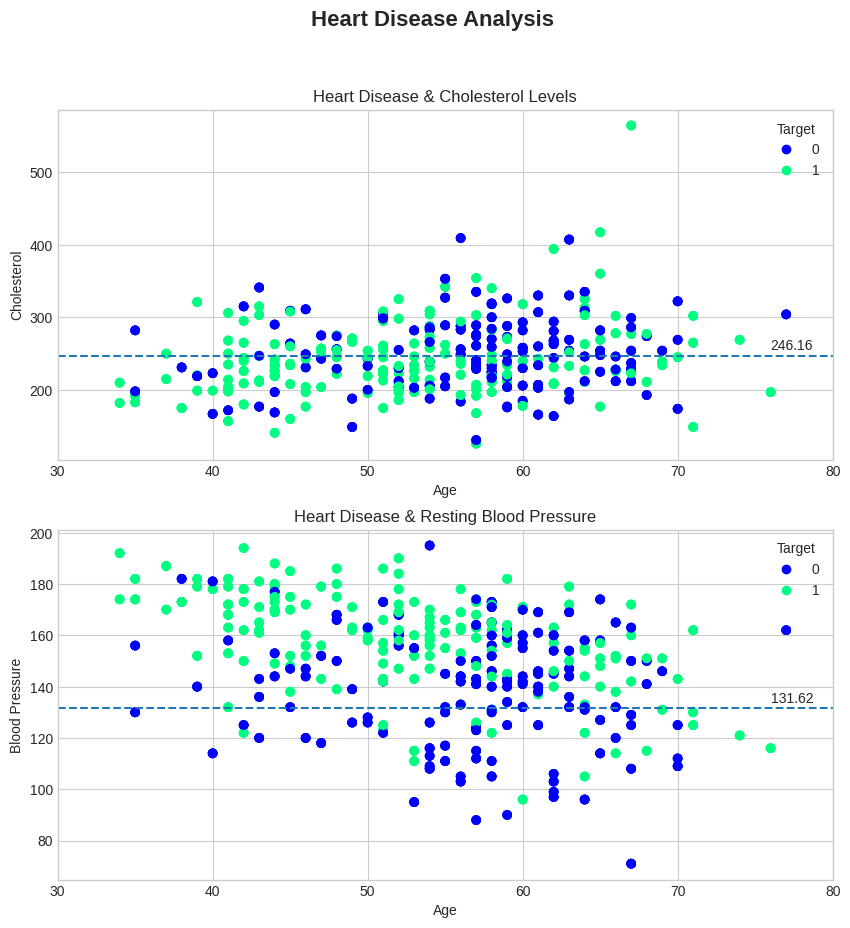

In [9]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10))

# Add data to ax0
scatter = ax0.scatter(x=over_30["age"],
                      y=over_30["chol"],
                      c=over_30["target"],
                      cmap="winter") # change plot (matplotlib.org)

# Customize ax0
ax0.set(title="Heart Disease & Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")

ax0.set_xlim([30, 80]) # Change x axis limit

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax0.axhline(y=over_30["chol"].mean(),
            linestyle="--")

ax0.text(76, over_30["chol"].mean()+10, round(over_30["chol"].mean(),2)) # Add mean value to line

# Add data to ax1
scatter = ax1.scatter(x=over_30["age"],
                      y=over_30["thalach"],
                      c=over_30["target"],
                      cmap="winter") # change plot (matplotlib.org)

# Customize ax1
ax1.set(title="Heart Disease & Resting Blood Pressure",
        xlabel="Age",
        ylabel="Blood Pressure")

ax1.set_xlim([30, 80]) # Change x axis limit

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(y=over_30["trestbps"].mean(),
            linestyle="--")

ax1.text(76, over_30["trestbps"].mean()+2, round(over_30["trestbps"].mean(),2)) # Add mean value to line

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


# Prediction
Build a classifier to predict whether a person is prone to heart attack or not. 

#### Install Autogluon

In [10]:
# install autogluon
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 728.2 kB

#### Imports

In [11]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [12]:
# Same Data but different type, so I change the variable name to data instead of df
data = TabularDataset('/kaggle/input/heart-disease-dataset/heart.csv')

Loaded data from: /kaggle/input/heart-disease-dataset/heart.csv | Columns = 14 / 14 | Rows = 1025 -> 1025


In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
data.info()

<class 'autogluon.core.dataset.TabularDataset'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
train_size = 820 # 0.8*len(data)
seed = 42

train_data = data.sample(train_size, random_state=seed)
test_data = data.drop(train_data.index)

#### Training a model

In [16]:
save_path = 'reservation_predictors'

In [17]:
predictor = TabularPredictor(label='target', path=save_path)

In [18]:
type(predictor)

autogluon.tabular.predictor.predictor.TabularPredictor

In [19]:
predictor.fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "reservation_predictors/"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat May 20 10:48:19 UTC 2023
Train Data Rows:    820
Train Data Columns: 13
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    15721.59 MB
	Train Data (Original)  Memory Usage: 0.09 MB (0.0% of available memory)
	Inferring data type of each feature based o

> From above output, we can see that the best model is WeightedEnsemble_L2 (Best model: "WeightedEnsemble_L2")

In [20]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost   0.993902       0.002634  1.209918                0.002634           1.209918            1       True          7
1              LightGBM   0.993902       0.002830  0.335967                0.002830           0.335967            1       True          4
2   WeightedEnsemble_L2   0.993902       0.004148  1.259629                0.001318           0.923662            2       True         14
3      RandomForestEntr   0.993902       0.091164  0.918696                0.091164           0.918696            1       True          6
4      RandomForestGini   0.993902       0.093028  0.824127                0.093028           0.824127            1       True          5
5         LightGBMLarge   0.987805       0.008288  0.826434                0.008288           0.826434        

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6951219512195121,
  'KNeighborsDist': 0.9512195121951219,
  'LightGBMXT': 0.9817073170731707,
  'LightGBM': 0.9939024390243902,
  'RandomForestGini': 0.9939024390243902,
  'RandomForestEntr': 0.9939024390243902,
  'CatBoost': 0.9939024390243902,
  'ExtraTreesGini': 0.9817073170731707,
  'ExtraTreesEntr': 0.9817073170731707,
  'NeuralNetFastAI': 0.975609756097561,
  'XGBoost': 0.9817073170731707,
  'NeuralNetTorch': 0.9878048780487805,
  'LightGBMLarge': 0

In [21]:
# Load the predictor that I have saved
brand_new_preditor = TabularPredictor.load("reservation_predictors/")

### Validation
Evaluate the model performance on the unseen test data:

To validate this model, drop the label from the test data and subsequently store it:

In [22]:
y_test = test_data['target']

In [23]:
test_features = test_data.drop(columns=['target'])

In [24]:
y_test

1       0
4       0
13      0
14      0
20      0
       ..
1003    1
1007    1
1009    0
1019    1
1023    1
Name: target, Length: 205, dtype: int64

In [25]:
y_pred = brand_new_preditor.predict(test_features)
y_pred

1       0
4       0
13      0
14      0
20      1
       ..
1003    0
1007    1
1009    0
1019    1
1023    1
Name: target, Length: 205, dtype: int64

In [26]:
# Accuracy
sum(y_test == y_pred)/len(y_test)

0.9512195121951219

In [27]:
metrics = predictor.evaluate_predictions(y_true=y_test,y_pred=y_pred,auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.9512195121951219
Evaluations on test data:
{
    "accuracy": 0.9512195121951219,
    "balanced_accuracy": 0.951496093005527,
    "mcc": 0.9025622511268953,
    "f1": 0.9523809523809524,
    "precision": 0.9615384615384616,
    "recall": 0.9433962264150944
}


In [28]:
metrics

{'accuracy': 0.9512195121951219,
 'balanced_accuracy': 0.951496093005527,
 'mcc': 0.9025622511268953,
 'f1': 0.9523809523809524,
 'precision': 0.9615384615384616,
 'recall': 0.9433962264150944}

In [29]:
# Features and Label
predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 13 features using 205 rows with 5 shuffle sets...
	0.71s	= Expected runtime (0.14s per shuffle set)
	0.2s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
ca,0.122927,0.019934,8.015592e-05,5,0.163972,0.081882
cp,0.104390,0.004363,3.653383e-07,5,0.113374,0.095407
age,0.078049,0.014222,1.266348e-04,5,0.107332,0.048766
sex,0.067317,0.010575,7.074620e-05,5,0.089092,0.045542
thal,0.065366,0.019081,7.804543e-04,5,0.104653,0.026079
oldpeak,0.051707,0.021706,2.989262e-03,5,0.096400,0.007014
exang,0.044878,0.010575,3.441407e-04,5,0.066653,0.023103
slope,0.044878,0.006360,4.713961e-05,5,0.057974,0.031782
thalach,0.039024,0.010348,5.414893e-04,5,0.060331,0.017718
chol,0.031220,0.005562,1.159284e-04,5,0.042671,0.019768


## Feature Importance
A feature’s importance score represents the performance drop that results when the model makes predictions on a perturbed copy of the data where this feature’s values have been randomly shuffled across rows. A feature score of 0.01 would indicate that the predictive performance dropped by 0.01 when the feature was randomly shuffled. The higher the score a feature has, the more important it is to the model’s performance. If a feature has a negative score, this means that the feature is likely harmful to the final model, and a model trained with the feature removed would be expected to achieve a better predictive performance. Note that calculating feature importance can be a very computationally expensive process, particularly if the model uses hundreds or thousands of features. In many cases, this can take longer than the original model training. To estimate how long feature_importance(model, data, features) will take, it is roughly the time taken by predict_proba(data, model) multiplied by the number of features.

# Conclusion

#### Benefits of using AutoML (AutoGluon)
In general, an AutoML model aims to automate all time-consuming operations like the selection of algorithms, writing the code, pipeline development, and hyperparameter tuning thereby allowing the data scientists to focus more on speedily resolving the business challenges at hand. Within the pipeline, the AutoML framework

1. Considers and selects multiple machine learning algorithms from the available ones like the random forest, k-Nearest Neighbor, SVMs, etc.
2. Performs data preprocessing steps like missing value imputation, feature scaling, feature selection, etc..,
3. Optimization or the hyperparameter tuning for all of the models
4. Decides/Tries multiple ways to ensemble or stack the algorithms

The following are the benefits of using the ‘AutoGluon’ library:

* Simplicity: Training of classification and regression models and deployment can be achieved with a few lines of code.
* Robustness: Without doing any feature engineering or data manipulation, users should be able to use raw data.
* Predictable-timing: Getting the best model under a specified time constraint.
* Fault-tolerance: Training can be resumed even if interrupted and the users can inspect all the intermediate steps.

AutoGluon helps me to save time and I can get more accuracy.<br>
🎉🎉🎉In this case, I have 95% accuracy (0.9512195121951219)